In [86]:
import sys
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from IPython.display import display
from preprocessing import preprocess
import re
from sklearn.datasets import fetch_20newsgroups
from feature_extraction import feature_extraction_fun
from clustering_module import pca_fun_cluster,optimal_clusters,kmeans_clustering,calculate_silhouette,tsne_fun
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from evaluation import evaluate_clustering
from visualization import  plot_pca,plot_elbow,plot_clusters,plot_solutt,plot_tsne
from evaluation import evaluate_clustering
import warnings
warnings.filterwarnings("ignore")

In [146]:
import importlib
import clustering_module
importlib.reload(clustering_module)

print(dir(clustering_module))  

['KMeans', 'PCA', 'TSNE', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'anything', 'calculate_silhouette', 'evaluate_clustering', 'kmeans_clustering', 'np', 'optimal_clusters', 'pca_fun_cluster', 'plt', 'tsne', 'tsne_fun']


In [35]:
import importlib
import visualization
importlib.reload(visualization)

print(dir(visualization))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'np', 'plot_clusters', 'plot_elbow', 'plot_pca', 'plot_solutt', 'plot_tsne', 'plt']


In [55]:
import importlib
import feature_extraction
importlib.reload(feature_extraction)

print(dir(feature_extraction))

['TfidfVectorizer', 'Word2Vec', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'feature_extraction_fun', 'gensim', 'get_sentence_vector', 'np']


<h2 style="color: #e67e22;"">Load and Read dataset</h2>


In [3]:

people_wiki_df = pd.read_csv("people_wiki.csv")

<h2 style="color: #3498db;"> Preprocessing dataset text </h2>



In [4]:
preprocessed=people_wiki_df['text'].apply(preprocess)

In [5]:
people_wiki_df.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


<h2 style="color: #9b59b6">Feature Extraction</h2>

In [57]:
feature_extraction_data = feature_extraction_fun(preprocessed)

print("feature extraction successfully")

print("Shape of sentence_vectors:", feature_extraction_data.shape)

Feature Extraction Function
feature extraction successfully
Shape of sentence_vectors: (42786, 100)


<h2 style="color: #2ecc71">Dimensionality Reduction For Clustering</h2>

In [58]:
pca_features, pca, per_var = pca_fun_cluster(feature_extraction_data,0.40)

print("pca: ",pca)
print("------------------------------------------------------")
print("pca features: ",pca_features)
print("------------------------------------------------------")
print("PCA features shape:", pca_features.shape)
print("------------------------------------------------------")
print("PCA components shape:", pca.components_.shape)
print("------------------------------------------------------")
print("PCA explained variance ratio:", per_var)
print("------------------------------------------------------")
print("PCA explained variance ratio:", pca.explained_variance_ratio_)



Dimensionality Reduction For Clustering
--------------------------------------------------------------------------------------
pca:  PCA(n_components=0.4)
------------------------------------------------------
pca features:  [[ 3.7101786   2.806614  ]
 [-1.4267905  -0.28052762]
 [ 1.5792521  -1.8209093 ]
 ...
 [ 3.1441116   2.1663382 ]
 [-1.5594919  -1.091593  ]
 [-0.53837013  1.2082535 ]]
------------------------------------------------------
PCA features shape: (42786, 2)
------------------------------------------------------
PCA components shape: (2, 100)
------------------------------------------------------
PCA explained variance ratio: [24.9 20.1]
------------------------------------------------------
PCA explained variance ratio: [0.24865158 0.20124894]


<h2 style="color: #ff6b6b">Clustering & Visualization</h2>

<span style="color:rgb(86, 86, 228)"> Identify optimal_clusters</span>

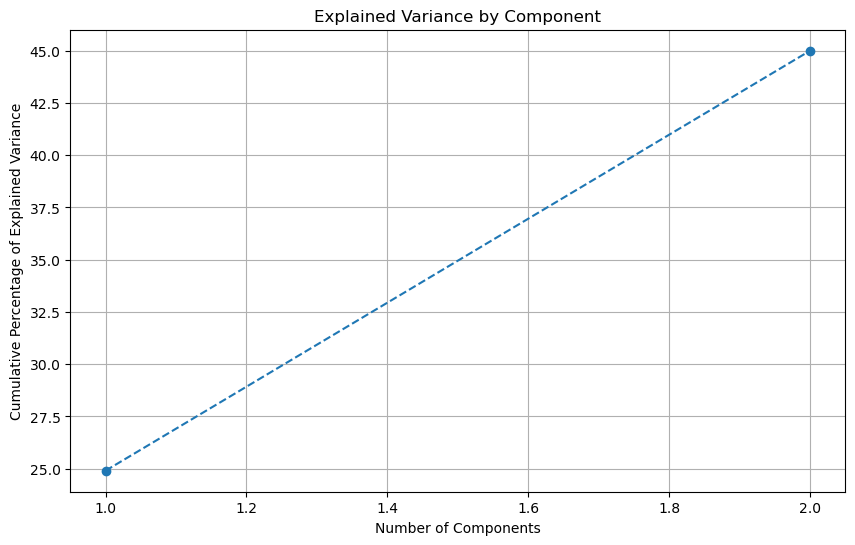

In [59]:
plot_pca(per_var)

<span style="color:rgb(199, 46, 204)"> Identify optimal_clusters</span>

In [60]:
iners=optimal_clusters(pca_features)

<span style="color:rgb(175, 140, 176)"> ploting Elbow Method</span>

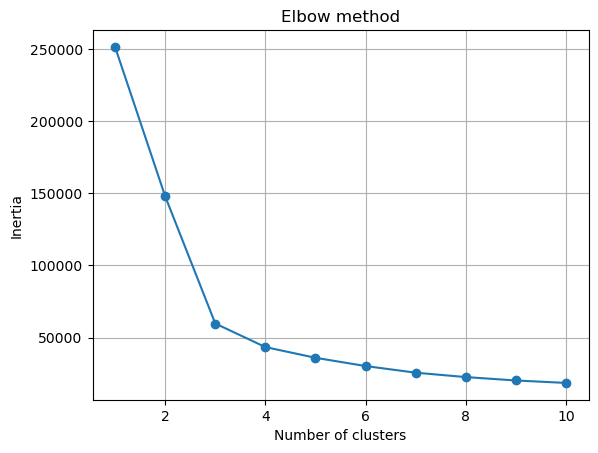

In [61]:
plot_elbow(iners)


<span style="color:rgb(46, 201, 204)"> From ELbow Method Plot :The optimal number  of clusters is 3</span>

<span style="color:rgb(152, 223, 81)"> apply KMeans Clustering</span>

In [62]:
cluster=kmeans_clustering(pca_features, 3)

In [63]:
cluster

array([2, 0, 1, ..., 2, 1, 0])

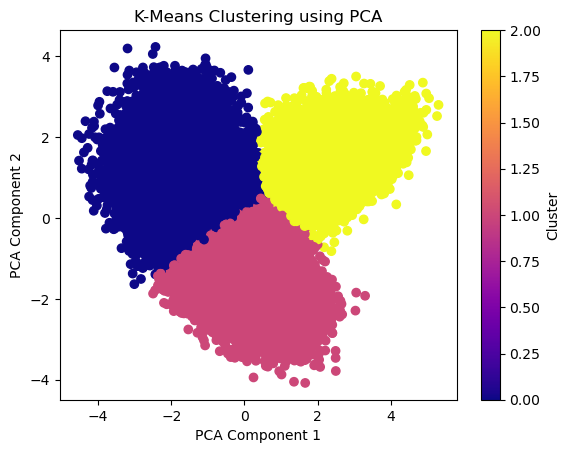

In [64]:
plot_clusters(pca_features, cluster)

<h1 style="color:rgb(223, 219, 98)"> Evaluation</h1>

In [66]:
silhouette, db_index,ch_index,mutual_info,adjusted_rand=evaluate_clustering(pca_features, 3)

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Calinski-Harabasz Index: {ch_index:.4f}")
print(f"Mutual Information: {mutual_info:.4f}")
print(f"Adjusted Rand Index: {adjusted_rand:.4f}")

print("Evaluation metrics calculated successfully")


Silhouette Score: 0.5450
Davies-Bouldin Index: 0.6210
Calinski-Harabasz Index: 68681.5000
Mutual Information: 1.0621
Adjusted Rand Index: 1.0000
Evaluation metrics calculated successfully


<span style="color: rgb(99, 24, 107); background: #FFFFFF; font-weight: bold;">
    The Silhouette Score is 0.5429 
</span>

<span style="color: rgb(16, 106, 203);">

Silhouette score near 1 signifies the best importance that the data point is very compact within the cluster to which it belongs and far away from the other clusters

</span>



<span style="color: rgb(99, 24, 107); background: #FFFFFF; font-weight: bold;">
    Davies-Bouldin Index is  0.6246
</span>

<span style="color: rgb(16, 106, 203);">

Davies-Bouldin Index Closer to 0 means better clustering

</span>


<span style="color: rgb(99, 24, 107); background: #FFFFFF; font-weight: bold;">
    Calinski-Harabasz Index: 67992.2460
</span>

<span style="color: rgb(16, 106, 203);">

Calinski-Harabasz Index Higher values indicate better-defined clusters

</span>



<span style="color: rgb(99, 24, 107); background: #FFFFFF; font-weight: bold;">
    Mutual Information: 1.0621
</span>

<span style="color: rgb(16, 106, 203);">

Mutual Information closer to 1 is good

</span>


<span style="color: rgb(99, 24, 107); background: #FFFFFF; font-weight: bold;">
    Adjusted Rand Index: 1.0000
</span>

<span style="color: rgb(16, 106, 203);">

Adjusted Rand Index 1  means perfect match with true labels

</span>



<span style="color: rgb(207, 143, 214); background:rgb(28, 25, 25); font-weight: bold;">
    from sklearn immediately to enshure the silhouette score 
</span>


In [65]:
silhouette_score(pca_features, cluster)

0.5449531


<span style="color: rgb(194, 68, 219);">

calculate silhouette and best score based on num of clusters and visualizing the scores 

</span>

In [67]:
sol_score=calculate_silhouette(pca_features)

In [68]:
print(sol_score)

[0.46676967, 0.5449531, 0.47247338, 0.43612534, 0.39869404, 0.39767027, 0.3790565, 0.37663227, 0.36001524]


<span style="color: rgb(16, 203, 75);">

plotting Silhouette Score 

</span>

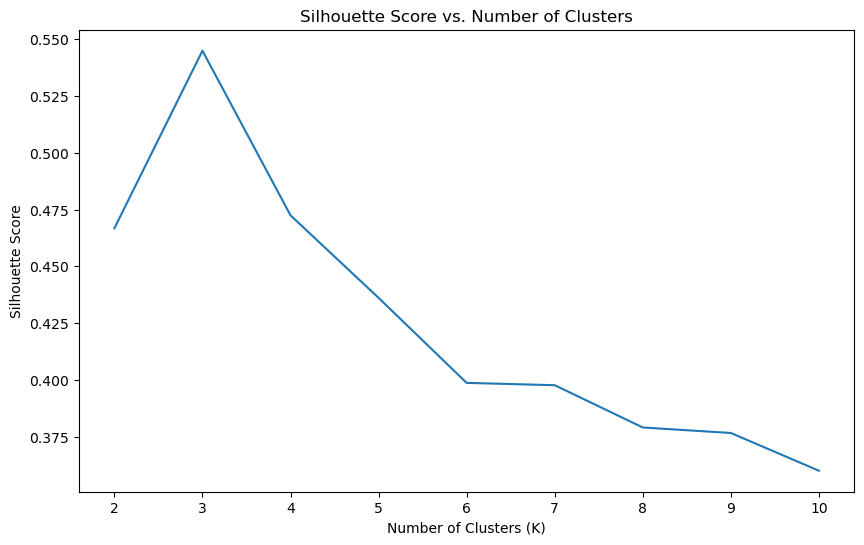

In [69]:
plot_solutt(range(2, 11),sol_score)

Tsne before PCA

In [70]:
tsne_result=tsne_fun(feature_extraction_data,2)

In [72]:
cluster_tsne=kmeans_clustering(tsne_result, 3)
silhouette_tsne, db_index_tsne,ch_index_tsne,mutual_info_tsne,adjusted_rand_tsne=evaluate_clustering(tsne_result, 3)

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Calinski-Harabasz Index: {ch_index:.4f}")
print(f"Mutual Information: {mutual_info:.4f}")
print(f"Adjusted Rand Index: {adjusted_rand:.4f}")

print("Evaluation metrics calculated successfully")

Silhouette Score: 0.5450
Davies-Bouldin Index: 0.6210
Calinski-Harabasz Index: 68681.5000
Mutual Information: 1.0621
Adjusted Rand Index: 1.0000
Evaluation metrics calculated successfully


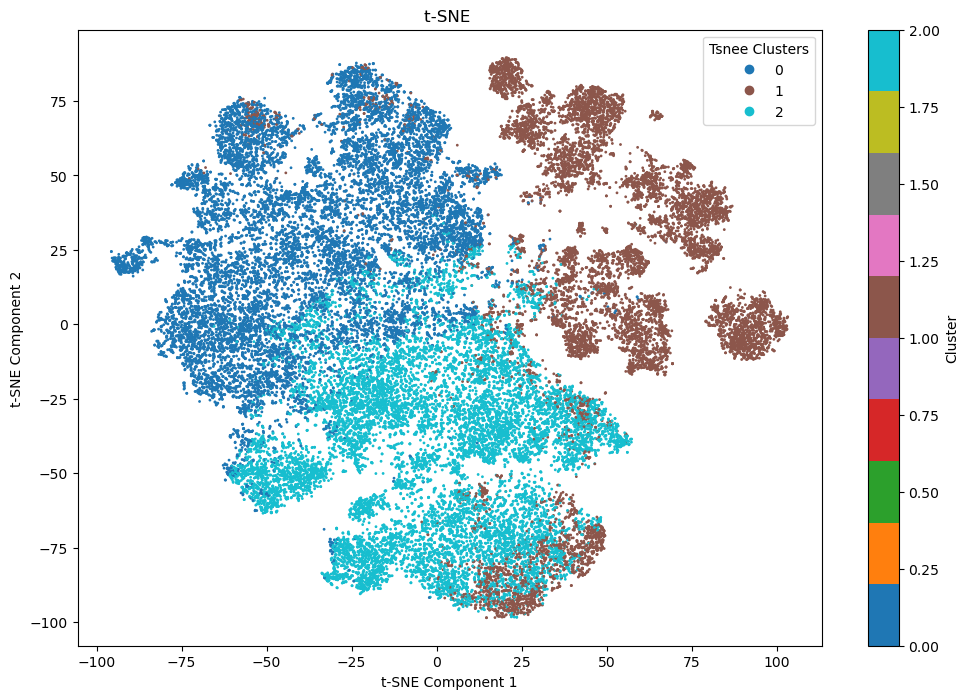

In [101]:
plot_tsne(tsne_result, cluster_tsne)

In [102]:
cluster_tsne

array([1, 0, 1, ..., 1, 2, 0])

Tsne after PCA

In [73]:
tsne_result_2=tsne_fun(pca_features,2)


In [76]:
cluster_tsne_2=kmeans_clustering(tsne_result_2, 3)

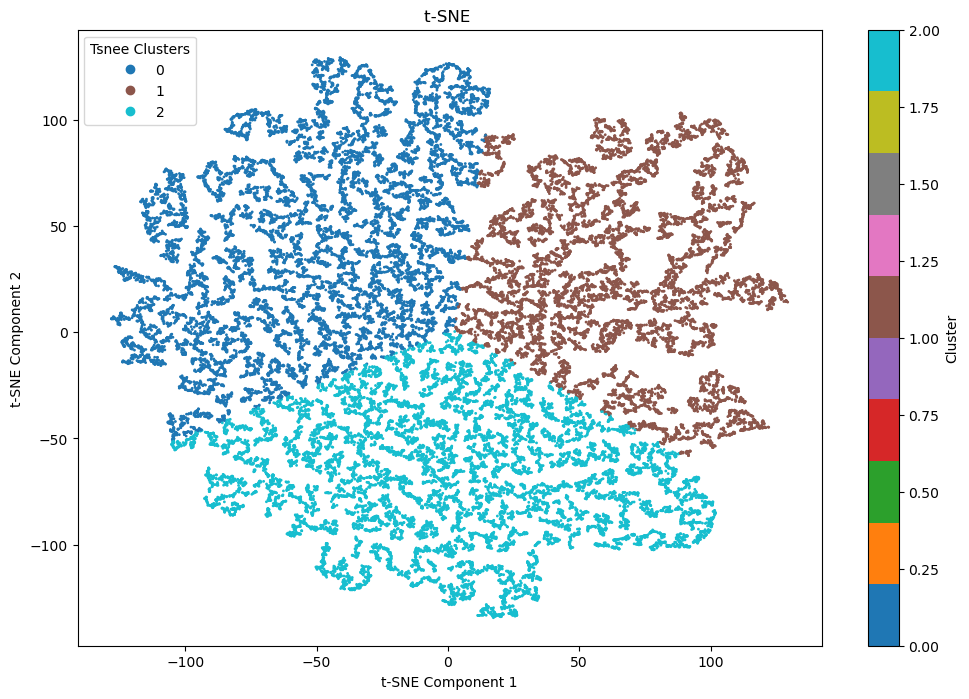

In [99]:
plot_tsne(tsne_result_2, cluster_tsne_2)

In [100]:
cluster_tsne_2

array([1, 0, 1, ..., 1, 2, 0])

In [78]:
silhouette_tsne, db_index_tsne,ch_index_tsne,mutual_info_tsne,adjusted_rand_tsne=evaluate_clustering(tsne_result_2, 3)

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Calinski-Harabasz Index: {ch_index:.4f}")
print(f"Mutual Information: {mutual_info:.4f}")
print(f"Adjusted Rand Index: {adjusted_rand:.4f}")

print("Evaluation metrics calculated successfully")


Silhouette Score: 0.5450
Davies-Bouldin Index: 0.6210
Calinski-Harabasz Index: 68681.5000
Mutual Information: 1.0621
Adjusted Rand Index: 1.0000
Evaluation metrics calculated successfully



<span style="color: rgb(206, 188, 210);">

Note: I tried tsne on data after pca and data before the same scores but it lower than Pca score so i will continue with pca data

</span>

<h1 style="color: rgb(99, 24, 107); background: #FFFFFF; font-weight: bold;">
    Clustering Analysis
</h1>

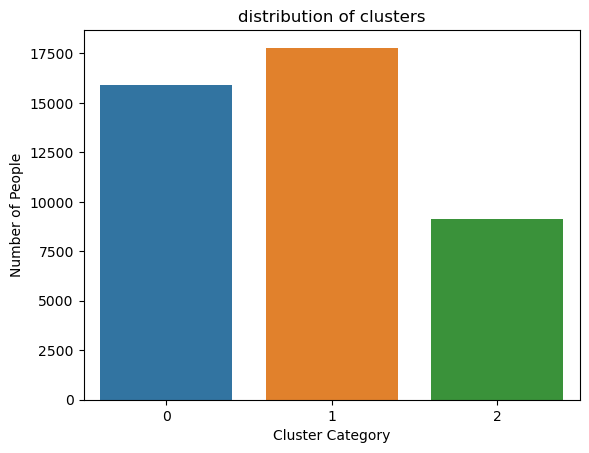

In [ ]:
sns.countplot(x=cluster, data=people_wiki_df)
plt.title("distribution of clusters")
plt.xlabel("Cluster Category")
plt.ylabel("Number of People")
plt.show()

<span style="color: rgb(179, 115, 186); background: #FFFFFF; font-weight: bold;">
    Clustering analyis with all trials
</span>


clustering using PCA 

In [103]:
data = pd.DataFrame({'Text': people_wiki_df['text'],'Cluster': cluster})
data

,Text,Cluster
0,digby morrell born 10 october 1979 is a former...,2
1,alfred j lewy aka sandy lewy graduated from un...,0
2,harpdog brown is a singer and harmonica player...,1
3,franz rottensteiner born in waidmannsfeld lowe...,1
4,henry krvits born 30 december 1974 in tallinn ...,1
...,...,...
42781,motoaki takenouchi born july 8 1967 saitama pr...,1
42782,alan graham judge born 14 may 1960 is a retire...,2
42783,eduardo lara lozano born 4 september 1959 in c...,2
42784,tatiana faberg is an author and faberg scholar...,1


clustering using TSNE after PCA 

In [ ]:
data_ckuster_tsne=pd.DataFrame({'Text': people_wiki_df['text'],'Cluster': cluster_tsne_2})
data_ckuster_tsne

,Text,Cluster
0,digby morrell born 10 october 1979 is a former...,1
1,alfred j lewy aka sandy lewy graduated from un...,0
2,harpdog brown is a singer and harmonica player...,1
3,franz rottensteiner born in waidmannsfeld lowe...,2
4,henry krvits born 30 december 1974 in tallinn ...,1
...,...,...
42781,motoaki takenouchi born july 8 1967 saitama pr...,2
42782,alan graham judge born 14 may 1960 is a retire...,1
42783,eduardo lara lozano born 4 september 1959 in c...,1
42784,tatiana faberg is an author and faberg scholar...,2



<span style="color: rgb(206, 66, 222); background: #FFFFFF; font-weight: bold;">
    Continue CLustering using PCA because PCA maintains global structure
</span>

